# **Deep Network Development Exam - Coding Section**

---

## **Student Information**
- **Name:** <*Enter your full name*>
- **Neptun ID:** <*Enter your Neptun ID*>
- **Date:** 23/05/2025  
- **Time Slot:** 09:00 - 09:30 (30 minutes)

---

## **Overview**

This coding task must be completed to qualify for the second part of the final exam (1-hour written session). Final course grades will be assigned based on overall performance during the active semester, provided both components are passed.

---

## **Task Requirements**

- Implement a **neural network architecture**, including a **functioning forward pass**.
- The code must run without errors and meet the minimum implementation criteria.

---

## **Rules and Resources**

| Allowed                            | Not Allowed                                  |
|-----------------------------------|----------------------------------------------|
| Internet access                   | Communication with others (e.g., Teams, WhatsApp, Messenger) |
| AI tools (e.g., ChatGPT, Copilot) | Collaboration or assistance from peers       |
| Practice notebooks                | Use of group chats, forums, or messaging apps|

> Any violation will result in **immediate disqualification** and a **failing grade**.

---

## **Submission Guidelines**

- Submit your solution as a **`.ipynb` file** on **Canvas**
- Late submissions or incomplete solutions will not be accepted
- Your code must be fully executable and meet the minimum task requirements

---

## **Retake Policy**

- If this part is failed, **one retake opportunity** will be provided  
- Failing the retake results in a **fail for the course**

---

**Good luck!**


## **Task Description**

Your task is to implement a **custom neural network architecture**, including a fully functional `forward()` method.

You will be provided with a **diagram of the model architecture**. Some components will contain a **`?` symbol**, indicating that you must determine and specify the appropriate hyperparameters or configurations based on the overall architecture and problem.

Please note the following:
- **All layers shown in the diagram must be included** in your implementation.
- In some cases, **connections may not be fully drawn**, but this does not mean the layer is optional.
- Only the **final output dimensions** are required to match exactly.
- The implementation will be **manually reviewed**, so correctness of structure and logic is essential.


# **0. Necessary Imports and Data Loading**

In [200]:
# Cell 0.1 (DO NOT EDIT THIS CELL!)

import os
import torch
import gdown
import requests
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

from PIL import Image
from torchvision import transforms

In [131]:
# Cell 0.2 (DO NOT EDIT THIS CELL!)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [133]:
# Cell 0.3 -> INPUT (DO NOT EDIT THIS CELL!)
url = 'https://drive.google.com/uc?id=1NUW-91kBqkx5bhiJDmtD_DyXvjFzo8sD'
output = 'input_image.png'

try:
    gdown.download(url, output, quiet=False)
    input_image = Image.open(output).convert('RGB')

    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
    ])

    input_tensor = transform(input_image).unsqueeze(0).to(device)
except:
    input_tensor = torch.randn(1, 3, 128, 128)
    input_image = transforms.ToPILImage()(input_tensor.squeeze(0).to(device))

Downloading...
From: https://drive.google.com/uc?id=1NUW-91kBqkx5bhiJDmtD_DyXvjFzo8sD
To: /content/input_image.png
100%|██████████| 224k/224k [00:00<00:00, 76.4MB/s]


In [134]:
# Cell 0.4 -> INPUT (DO NOT EDIT THIS CELL!)
vocab_size = 16
input_tokens = torch.randint(0, vocab_size, (1, 16)).to(device)
print(input_tokens.shape)

torch.Size([1, 16])


Tensor shape: torch.Size([1, 3, 128, 128])


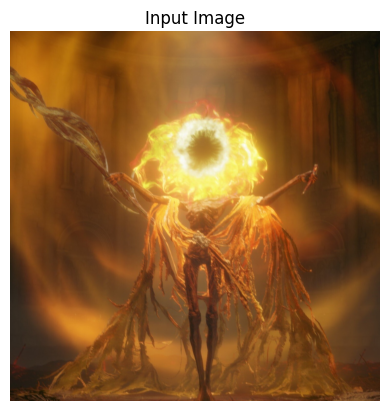

In [6]:
# Cell 0.5 (DO NOT EDIT THIS CELL!)
print("Tensor shape:", input_tensor.shape)

plt.imshow(input_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

## **1. Architecture**

To better view the architecture diagram:  
- **Right-click the image** and select **"Open image in a new tab"** to enable zoom for a clearer view.  
- Alternatively, you can **download the image** using the link below:  
  [Download Architecture Diagram](https://drive.google.com/file/d/1sI_BNTGcoG_MYyJ99NTpHpdkZqfxcGB-/view?usp=sharing)

---

### **Diagram Preview**:
![Architecture Diagram](https://drive.google.com/uc?export=view&id=1sI_BNTGcoG_MYyJ99NTpHpdkZqfxcGB-)


In [232]:
# Cell 1.1 (EDIT THIS CELL!)

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.upper=nn. Sequential(nn.MaxPool2d(kernel_size=2, stride=2),
                                  nn.ConvTranspose2d(in_channels=3, out_channels=3, kernel_size=2, stride=2, padding=0))
        self.cont=nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.cont1=nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=2, padding=1)
        )
        self.cont2=nn.Sequential(
                        nn.BatchNorm2d(16)
        )



    def forward(self, x, text):
        print(f"[image] Input image shape: {x.shape}")
        print(f"[text] Input text shape: {text.shape}")

        x_upper = self.upper(x)
        print(x_upper.shape)
        gaus=torch.randn(1, 3, 128, 128).to(device)
        print(gaus.shape)
        x1=x+gaus+x_upper
        print(x1.shape)
        x2=self.cont(x1)
        print('x2 shape')
        print(x2.shape)
        x3_cov=self.cont1(x2)
        print('x3 cov shape')
        batch,channnels,height,weidth=x3_cov.shape
        print(x3_cov.shape)
        x3_full1=self.cont2(x3_cov)
        print('x3 full shape')
        print(x3_full1.shape)
        x3_full=nn.ReLU()(x3_full1)
        print(x3_full.shape)
        x2_max=nn.MaxPool2d(kernel_size=2, stride=2)(x2)
        print('x2_max shape')
        print(x2_max.shape)
        embeded=nn.Embedding(16,1024).to(device)
        embeded_text1=embeded(text)
        embeded_text=embeded(text)
        print('embeded shape')
        print(embeded_text.shape)
        #transform text into batch,channels,width from 1,16,1024
        texted= embeded_text.permute(0, 2, 1).contiguous()
        texted = texted.view(batch,channnels,height,weidth)

        text_cov=nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=2, padding=1).to(device)
        texted_2=text_cov(texted)
        print('texted_2 shape')
        print(texted.shape)
        concats=torch.cat((texted,x2_max,x3_full),dim=1)
        print('conca shape')
        print(concats.shape)
        linear_emded=nn.Linear(1024,256).to(device)
        linear_output=linear_emded(embeded_text1)
        print('linear output shape')
        print(linear_output.shape)

        ltsm=nn.LSTM(input_size=32,hidden_size=256,num_layers=2,batch_first=True).to(device)
        concats = concats.view(1,32,-1)


        x_seq = concats.permute(0, 2, 1)
        print('x_seq shape')
        print(x_seq.shape)
        ltsm_output,outs=ltsm(x_seq)
        print('ltsm output shape')
        print(ltsm_output.shape)
        gauss=torch.randn(1,1536,256).to(device)
        print('gauss shape')
        print(gauss.shape)
        output=ltsm_output+gauss

        print('output shape')
        print(output.shape)
        return output
        return x

In [233]:
# Cell 1.2 (DO NOT EDIT THIS CELL!)

custom_model = CustomModel().to(device)

output = custom_model(input_tensor, input_tokens)

print("Output Shape:", output.shape)

try:
    assert output.shape == (1, 1536, 256), "Output shape is incorrect."
    print("\n🎉 Congratulations! Your implementation is correct. You passed the first part of the exam! 🎉")
except AssertionError as e:
    print(f"\n❌ Error: {e}")

[image] Input image shape: torch.Size([1, 3, 128, 128])
[text] Input text shape: torch.Size([1, 16])
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
x2 shape
torch.Size([1, 16, 64, 64])
x3 cov shape
torch.Size([1, 16, 32, 32])
x3 full shape
torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 32, 32])
x2_max shape
torch.Size([1, 16, 32, 32])
embeded shape
torch.Size([1, 16, 1024])
texted_2 shape
torch.Size([1, 16, 32, 32])
conca shape
torch.Size([1, 48, 32, 32])
linear output shape
torch.Size([1, 16, 256])
x_seq shape
torch.Size([1, 1536, 32])
ltsm output shape
torch.Size([1, 1536, 256])
gauss shape
torch.Size([1, 1536, 256])
output shape
torch.Size([1, 1536, 256])
Output Shape: torch.Size([1, 1536, 256])

🎉 Congratulations! Your implementation is correct. You passed the first part of the exam! 🎉
